<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Practice" data-toc-modified-id="Practice-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Practice</a></span></li><li><span><a href="#Excercise" data-toc-modified-id="Excercise-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Excercise</a></span></li></ul></div>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Practice

In [5]:
from sklearn.datasets import load_iris

In [8]:
iris = load_iris()

In [9]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [14]:
df['flower'] = df['target'].apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [15]:
df0 = df[df['target']==0]
df1 = df[df['target']==1]
df2 = df[df['target']==2]

**Setosa vs. Versicolor**

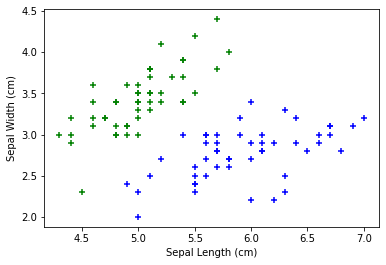

In [16]:
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'], color='green', marker='+')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'], color='blue', marker='+')


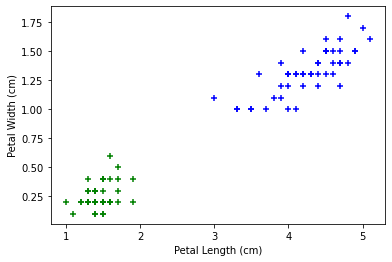

In [17]:
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'], color='green', marker='+')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], color='blue', marker='+')


In [21]:
from sklearn.model_selection import train_test_split

X = df.drop(['target', 'flower'], axis=1)
y = df.target

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [22]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)

neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [23]:
neigh.score(X_test, y_test)

0.9666666666666667

In [25]:
neigh.score(X_train, y_train)

0.9583333333333334

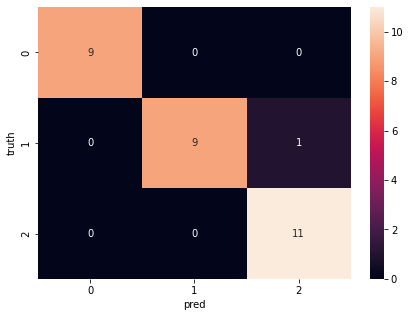

In [31]:
from sklearn.metrics import confusion_matrix

y_predicted = neigh.predict(X_test)

cm = confusion_matrix(y_test, y_predicted)
plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True)
plt.xlabel('pred')
plt.ylabel('truth');

In [33]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      0.90      0.95        10
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



### Excercise

1. Classify digits using KNN classifier. You can use different values for k neighbors and need to figure out a value of K that gives you maximum score. 

2. Plot confusion matrix

3. Plot classification report

In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_digits
digits = load_digits()

clf = GridSearchCV(KNeighborsClassifier(), {
    'n_neighbors': range(20)
}, cv=5, return_train_score=False)

clf.fit(digits.data, digits.target)
clf.cv_results_

{'mean_fit_time': array([0.00040026, 0.00020018, 0.0004004 , 0.00080066, 0.00040035,
        0.0004004 , 0.0004005 , 0.00060048, 0.00020018, 0.00080066,
        0.00020032, 0.00040045, 0.00040035, 0.00020032, 0.00040026,
        0.0008009 , 0.0004003 , 0.00060048, 0.00060053, 0.0008009 ]),
 'std_fit_time': array([0.00049021, 0.00040035, 0.00049039, 0.00040033, 0.00049033,
        0.00049039, 0.0004905 , 0.00049029, 0.00040035, 0.00040033,
        0.00040064, 0.00049045, 0.00049033, 0.00040064, 0.00049021,
        0.00040045, 0.00049027, 0.00049029, 0.00049033, 0.00040045]),
 'mean_score_time': array([0.        , 0.01060958, 0.01141019, 0.01081004, 0.01381235,
        0.01361222, 0.01401262, 0.01361232, 0.01481342, 0.01421304,
        0.01301174, 0.01361203, 0.01401267, 0.01361217, 0.01441312,
        0.01441288, 0.015414  , 0.01341228, 0.01401267, 0.0150135 ]),
 'std_score_time': array([0.        , 0.0012009 , 0.00135748, 0.00116719, 0.00116733,
        0.00102042, 0.00109593, 0.000800

In [41]:
df = pd.DataFrame(clf.cv_results_)
df[['params', 'mean_test_score', 'rank_test_score']]

,params,mean_test_score,rank_test_score
0,{'n_neighbors': 0},NaN,20
1,{'n_neighbors': 1},0.964393,3
2,{'n_neighbors': 2},0.967171,1
3,{'n_neighbors': 3},0.966622,2
4,{'n_neighbors': 4},0.963841,4
5,{'n_neighbors': 5},0.962728,5
6,{'n_neighbors': 6},0.959386,7
7,{'n_neighbors': 7},0.959946,6
8,{'n_neighbors': 8},0.958276,8
9,{'n_neighbors': 9},0.956611,9


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        61
           1       0.93      1.00      0.97        56
           2       1.00      1.00      1.00        56
           3       0.97      1.00      0.98        65
           4       1.00      0.98      0.99        51
           5       1.00      0.95      0.98        44
           6       0.96      1.00      0.98        52
           7       1.00      1.00      1.00        45
           8       1.00      0.90      0.95        51
           9       0.98      0.98      0.98        59

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540



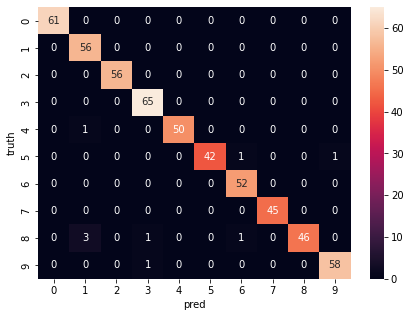

In [44]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size = 0.3)

neigh_digits = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_test, y_test)

y_predicted = neigh.predict(X_test)

cm = confusion_matrix(y_test, y_predicted)
plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True)
plt.xlabel('pred')
plt.ylabel('truth');

from sklearn.metrics import classification_report

print(classification_report(y_test, y_predicted))